# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from customer of a food delivery company.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will specify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

***Features:***
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- ***Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise*** 
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- The First Look

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering with numeric features

    * Create a new dataset with numeric features
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Clustering based on selected features

    * Create a new dataset with variables of your choice*
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering with selected features

    * Determine optimal number of clusters using Dendogram*

    * Apply Agglomerative Clustering*

    * Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

### Import Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.metrics import silhouette_score

from ipywidgets import interact
import warnings

warnings.filterwarnings("ignore")

pd.options.display.float_format = (
    lambda x: "{:.0f}".format(x) if int(x) == x else "{:,.2f}".format(x)
)

In [3]:
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 120)
pd.set_option("display.max_rows",None)

In [4]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Prevent line wrapping

In [5]:
from datetime import date,datetime

### Load Dataset

In [6]:
r0 = pd.read_csv("C:/Data Science/ML/assignments/proje 3/marketing_campaign.csv" ,encoding='latin1',sep=';')

### The First Look
- Since we will do clustering analysis, we will remove Response variable from dataset.
- You can rename columns to more usable, if you need.

In [7]:
r0.shape

(2240, 29)

In [8]:
r0.sample(5)

,ï»¿ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2182,3266,1964,Graduation,Married,42523,0,0,2014-04-23,96,14,36,11,3,26,35,1,1,1,4,2,0,0,0,0,0,0,3,11,0
1501,5751,1973,2n Cycle,Divorced,31163,1,0,2014-02-13,54,2,3,10,11,2,10,1,1,0,3,6,0,0,0,0,0,0,3,11,0
926,2008,1978,Graduation,Married,77583,0,0,2014-02-10,93,372,23,384,250,12,108,1,4,5,9,2,0,0,0,1,0,0,3,11,0
1308,5758,1982,Graduation,Married,65169,0,0,2014-01-14,23,1074,0,69,0,0,46,1,10,4,13,6,1,0,1,1,1,0,3,11,1
1489,5763,1972,Master,Together,49854,1,0,2013-11-10,63,123,17,171,39,0,30,5,6,2,5,6,0,0,0,0,0,0,3,11,0


In [9]:
r0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ï»¿ID                2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
r0.Year_Birth.describe()

count       2240
mean    1,968.81
std        11.98
min         1893
25%         1959
50%         1970
75%         1977
max         1996
Name: Year_Birth, dtype: float64

In [11]:
r0.isna().sum()

ï»¿ID                   0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [12]:
r1=r0.copy()

#### ** Outlier Control 

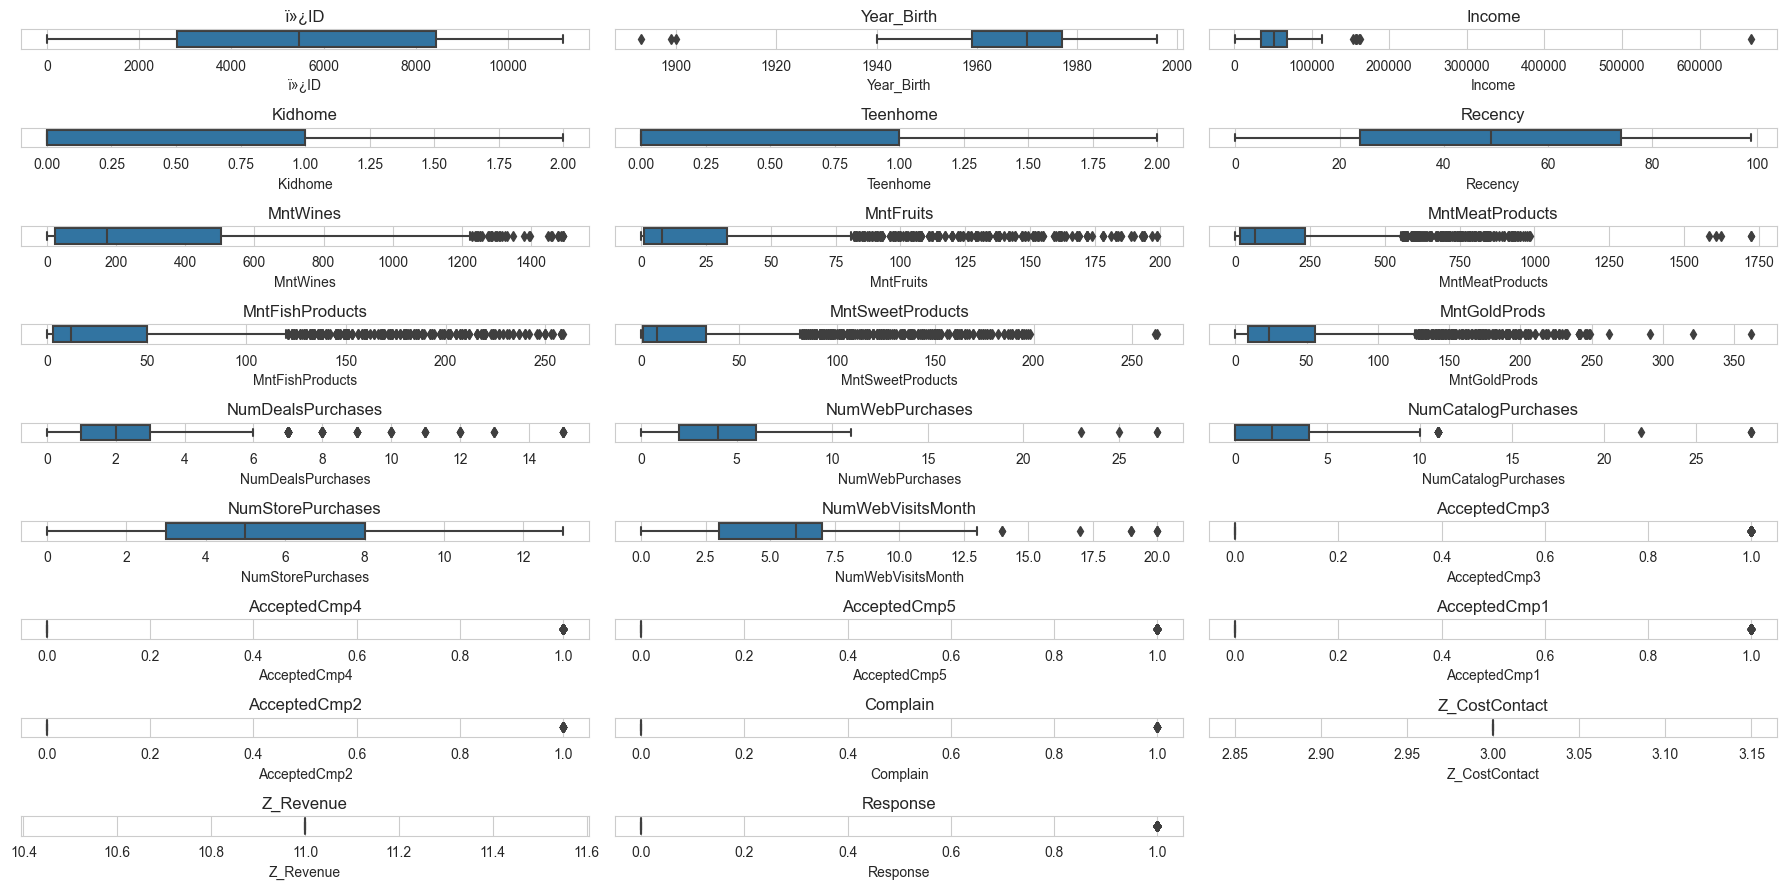

In [13]:
numeric_cols = r1.select_dtypes(include=["number"]).columns
n_cols = 3  # columns per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # calculate needed rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 1 * n_rows), dpi=100)

# Flatten axes array if 2D
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=r1[col], ax=axes[i])
    axes[i].set_title(col)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### **Drop columns

#### ***Drop columns that don't needed

In [14]:
r1.columns[0]

'ï»¿ID'

In [15]:
r1.drop(columns=['ï»¿ID'], axis=1, inplace=True)

In [16]:
r1.shape

(2240, 28)

#### ***Drop columns with single value

In [17]:
r1.Z_CostContact.value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [18]:
r1.Z_Revenue.value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [19]:
r1.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)
print(r1.shape, '\n',r1.columns)

(2240, 26) 
 Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')


#### ***Drop columns - duplicated 

In [20]:
r1.drop(columns=['Response'],inplace=True)
print(r1.shape)   #, '\n',r1.columns)

(2240, 25)


### **Change DType 

In [21]:
r1['Dt_Customer'].dtype

dtype('O')

In [22]:
r1['Dt_Customer'] = pd.to_datetime(r1['Dt_Customer'])
r1['Dt_Customer'].dtype

dtype('<M8[ns]')

In [23]:
r1['Dt_Customer'].describe()

count                    2240
unique                    663
top       2012-08-31 00:00:00
freq                       12
first     2012-07-30 00:00:00
last      2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

### **Future Transformation

#### *** 'Dt_Customer'

In [24]:
r2=r1.copy()

In [25]:
r2['max_date'] = r2['Dt_Customer'] + pd.to_timedelta(r2['Recency'], unit='D')

In [26]:
r2['max_date'].describe()

count                    2240
unique                    704
top       2014-06-25 00:00:00
freq                       10
first     2012-08-04 00:00:00
last      2014-10-04 00:00:00
Name: max_date, dtype: object

##### !!!! Decision for the processing date 

In [27]:
today = datetime(2014, 12, 31)
today

datetime.datetime(2014, 12, 31, 0, 0)

In [28]:
r2['Customer_Since_Days'] = (today - r2['Dt_Customer']).dt.days
r2['Customer_Since_Days'].dtype

dtype('int64')

In [29]:
r2['Customer_Since_Days'].sample()

680    439
Name: Customer_Since_Days, dtype: int64

#### *** 'Year_Birth'

In [30]:
r2['Age'] = 2015 - r2['Year_Birth']
r2['Age'].sample()

1496    38
Name: Age, dtype: int64

#### *** 'AcceptedCmp' Columns: Transform binary columns to continues-numeric column

In [31]:
r2['AcceptedCmps']=r2['AcceptedCmp1']+r2['AcceptedCmp2']+r2['AcceptedCmp3']+r2['AcceptedCmp4']+r2['AcceptedCmp5']
r2['AcceptedCmps'].sample(5)

1146    1
291     0
1579    0
290     1
940     0
Name: AcceptedCmps, dtype: int64

#### *** Check the rest binary Columns

In [32]:
r2.Complain.value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [33]:
r2.shape

(2240, 29)

#### ** Drop Rows with Outlier Values

In [34]:
#(r2['Kidhome'] + r2['Teenhome'] )== 0
conditions = (
    (r2['Year_Birth'] < 1939) |
    (r2['Income'] > 200000)
    )

# Drop those rows
r2 = r2[~conditions].copy()
r2.shape

(2236, 29)

### **NULL values

In [35]:
r2.Income.isna().sum()

24

In [36]:
r2[r2.Income.isna()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,max_date,Customer_Since_Days,Age,AcceptedCmps
10,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,2013-11-26,411,32,0
27,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,2013-03-11,679,29,0
43,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,2014-01-24,421,56,0
48,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,2014-04-07,364,64,0
58,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,2013-08-13,562,33,0
71,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,2012-10-09,838,42,0
90,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,2012-11-23,772,58,0
91,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,2014-07-11,218,58,0
92,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,2014-02-18,403,42,0
128,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,2013-08-03,538,54,0


In [37]:
r2.Marital_Status.value_counts()

Married     864
Together    578
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [38]:
r2.Education.value_counts()

Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

In [39]:
#### ** Fill NULL Values

In [40]:
r3=r2.copy()

In [41]:
r3['Income'] = r3['Income'].fillna(
    r3.groupby(['Education', 'Marital_Status', 'Age'])['Income'].transform('mean')
)

In [42]:
r3.Income.isna().sum()

3

In [43]:
r3[r3.Income.isna()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,max_date,Customer_Since_Days,Age,AcceptedCmps
92,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,2014-02-18,403,42,0
1383,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,2014-03-02,353,51,0
2084,1943,Master,Widow,NaN,0,0,2013-10-30,75,532,126,490,164,126,126,1,5,5,11,1,0,0,1,0,0,0,2014-01-13,427,72,1


In [44]:
r3['Income'] = r3['Income'].fillna(
    r3.groupby(['Education', 'Marital_Status'])['Income'].transform('mean')
)

In [45]:
r3.Income.isna().sum()

0

In [46]:
r3.Income.isnull().sum()

0

In [47]:
r3['Income'] = r3['Income'].astype(int)

<Axes: >

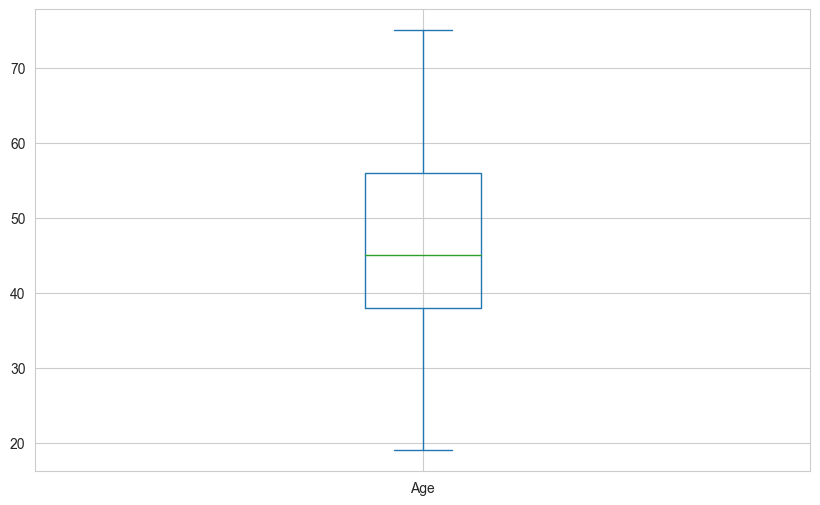

In [48]:
r3.Age.plot.box()

#### *** the relations between with income and age, marital status , education

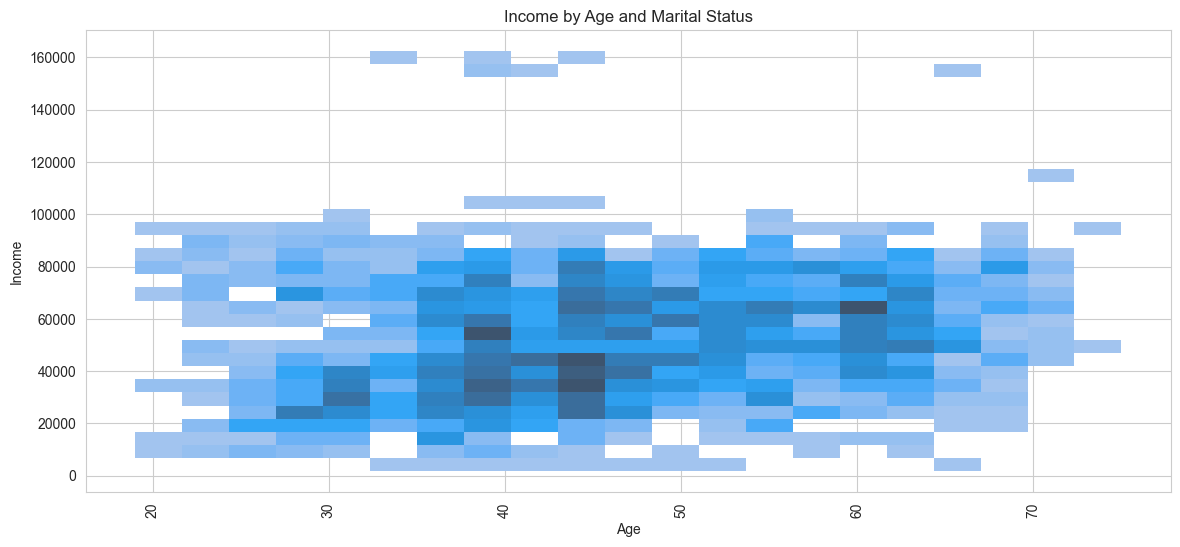

In [49]:
plt.figure(figsize=(14, 6))
sns.histplot(data=r2, x='Age', y='Income')#, hue='Marital_Status')
plt.title('Income by Age and Marital Status')
plt.xticks(rotation=90)
plt.show()


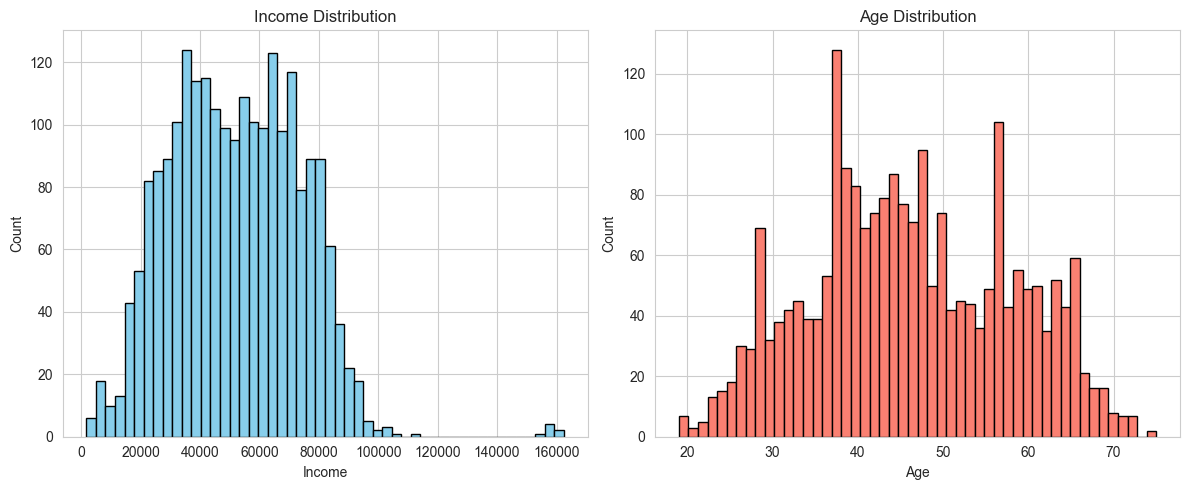

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Income histogram
plt.subplot(1, 2, 1)
plt.hist(r2['Income'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')

# Age histogram
plt.subplot(1, 2, 2)
plt.hist(r2['Age'], bins=50, color='salmon', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [51]:
r2[r2['Income']>100000].Income.sort_values().value_counts()

101970    1
102160    1
102692    1
105471    1
113734    1
153924    1
156924    1
157146    1
157243    1
157733    1
160803    1
162397    1
Name: Income, dtype: int64

In [52]:
r2[r2['Income']>100000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,max_date,Customer_Since_Days,Age,AcceptedCmps
124,1983,Graduation,Single,101970,0,0,2013-03-12,69,722,27,102,44,72,168,0,6,8,13,2,0,1,1,1,0,0,2013-05-20,659,32,3
164,1973,PhD,Married,157243,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,2014-06-07,305,42,0
203,1977,PhD,Together,102160,0,0,2012-11-02,54,763,29,138,76,176,58,0,7,9,10,4,0,1,1,1,0,0,2012-12-26,789,38,3
252,1974,Graduation,Divorced,102692,0,0,2013-04-05,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,0,2013-04-10,635,41,4
617,1976,PhD,Together,162397,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,2013-07-04,576,39,0
646,1970,Graduation,Together,105471,0,0,2013-01-21,36,1009,181,104,202,21,207,0,9,8,13,3,0,0,1,1,0,0,2013-02-26,709,45,2
655,1975,Graduation,Divorced,153924,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2014-04-29,327,40,0
687,1982,PhD,Married,160803,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,2012-08-25,879,33,0
1300,1971,Master,Together,157733,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,2013-07-11,575,44,0
1653,1977,Graduation,Together,157146,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,2013-05-12,611,38,0


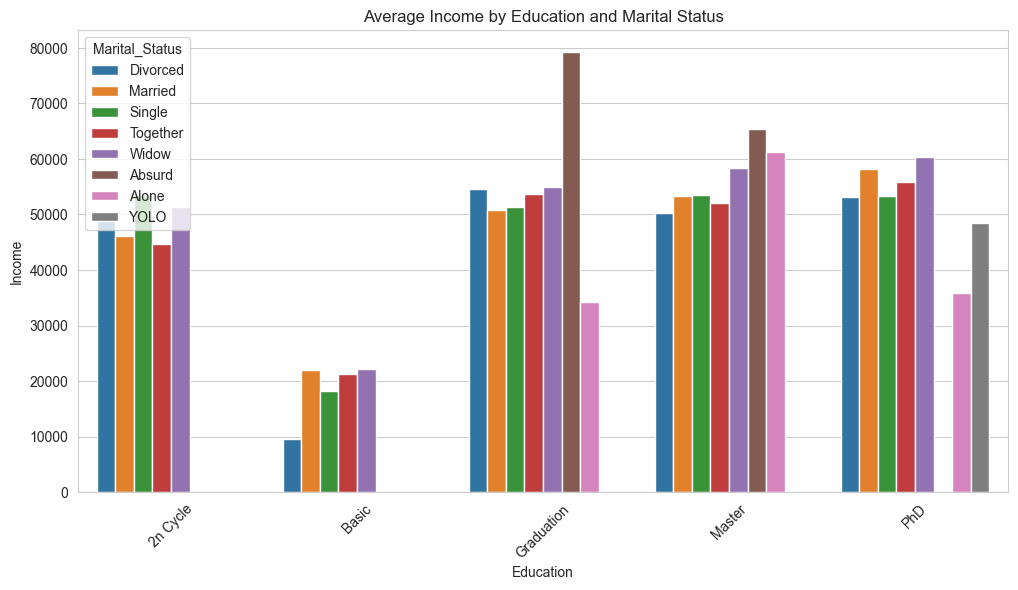

In [53]:
grouped = r2.groupby(['Education', 'Marital_Status'])['Income'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Education', y='Income', hue='Marital_Status')
plt.title('Average Income by Education and Marital Status')
plt.xticks(rotation=45)
plt.show()


In [54]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=r2, x='Age', y='Income', hue='Education')
# plt.title('Income vs Age colored by Education')
# plt.show()

### ** Create Clean df for ML

#### ++++ Alternative 1

In [55]:
r3.shape

(2236, 29)

In [56]:
r3.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'max_date', 'Customer_Since_Days', 'Age',
       'AcceptedCmps'],
      dtype='object')

In [57]:
r4=r3.drop(columns=['max_date','Year_Birth','Dt_Customer','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                    'AcceptedCmp2',
                   'Education', 'Marital_Status']).copy() # 'Education', 'Marital_Status' are categorical , it will be droped for the ML model
print(r3.shape)

(2236, 29)


In [58]:
r4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Income               2236 non-null   int32
 1   Kidhome              2236 non-null   int64
 2   Teenhome             2236 non-null   int64
 3   Recency              2236 non-null   int64
 4   MntWines             2236 non-null   int64
 5   MntFruits            2236 non-null   int64
 6   MntMeatProducts      2236 non-null   int64
 7   MntFishProducts      2236 non-null   int64
 8   MntSweetProducts     2236 non-null   int64
 9   MntGoldProds         2236 non-null   int64
 10  NumDealsPurchases    2236 non-null   int64
 11  NumWebPurchases      2236 non-null   int64
 12  NumCatalogPurchases  2236 non-null   int64
 13  NumStorePurchases    2236 non-null   int64
 14  NumWebVisitsMonth    2236 non-null   int64
 15  Complain             2236 non-null   int64
 16  Customer_Since_Days  223

#### ++++ Alternative 2

In [59]:
r2.shape

(2236, 29)

In [60]:
r2.Income.isna().sum()

24

In [61]:
r21=r2[~r2.Income.isna()].copy()

r21.shape

(2212, 29)

In [62]:
r21=r21.drop(columns=['max_date','Year_Birth','Dt_Customer','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                    'AcceptedCmp2',
                   'Education', 'Marital_Status']).copy() # 'Education', 'Marital_Status' are categorical , it will be droped for the ML model
print(r21.shape)

(2212, 19)


In [63]:
r21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2212 non-null   float64
 1   Kidhome              2212 non-null   int64  
 2   Teenhome             2212 non-null   int64  
 3   Recency              2212 non-null   int64  
 4   MntWines             2212 non-null   int64  
 5   MntFruits            2212 non-null   int64  
 6   MntMeatProducts      2212 non-null   int64  
 7   MntFishProducts      2212 non-null   int64  
 8   MntSweetProducts     2212 non-null   int64  
 9   MntGoldProds         2212 non-null   int64  
 10  NumDealsPurchases    2212 non-null   int64  
 11  NumWebPurchases      2212 non-null   int64  
 12  NumCatalogPurchases  2212 non-null   int64  
 13  NumStorePurchases    2212 non-null   int64  
 14  NumWebVisitsMonth    2212 non-null   int64  
 15  Complain             2212 non-null   i

#### ++++ Alternative 3

In [64]:
r22=r21.drop (columns='Complain').copy()
r22.shape

(2212, 18)

## Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.

<Axes: >

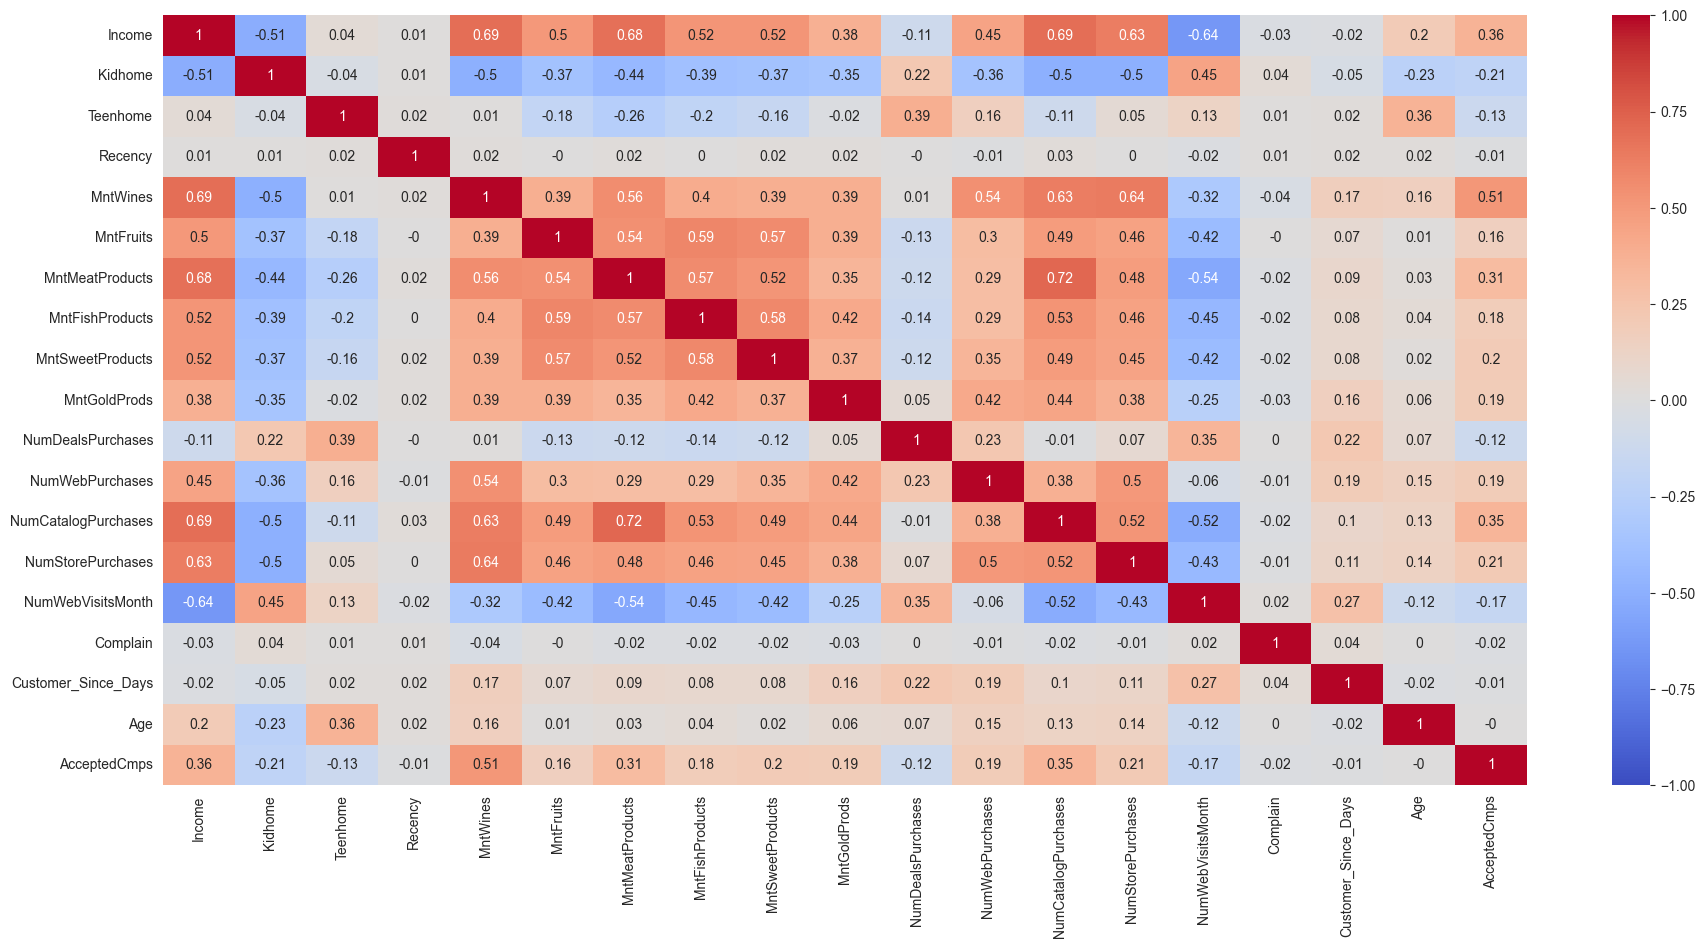

In [65]:
plt.figure(figsize=(22, 10))
sns.heatmap(r4.corr().round(2), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
#sns.heatmap(X_scaled_df.corr().round(2), vmin=-1, vmax=1, annot=True, cmap="coolwarm")

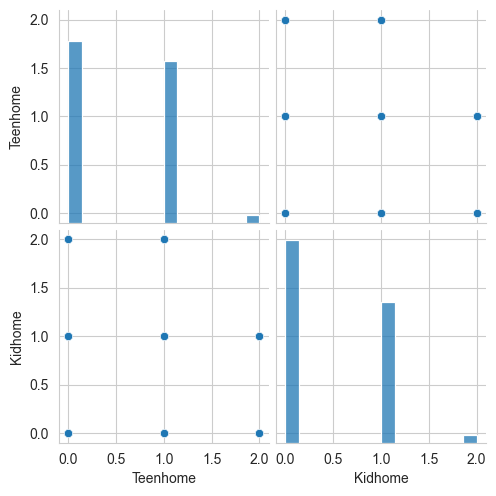

In [137]:
sns.pairplot(r2[['Teenhome', 'Kidhome']])

In [138]:
r2[['Teenhome', 'Kidhome']].value_counts()

Teenhome  Kidhome
0         0          637
1         0          624
0         1          501
1         1          374
          2           31
2         0           30
          1           22
0         2           17
dtype: int64

### Different Alternatives for PCA data source

In [66]:
#rx=r4
#rx=r21
rx=r22

### Data Scaling: Standart Scaler for PCA

In [201]:
scaler = StandardScaler()

In [202]:
scaled_X = scaler.fit_transform(rx)

In [299]:
scaled_X

array([[ 0.28710487, -0.82275354, -0.92969866, ...,  1.5277208 ,
         1.01835202, -0.43915996],
       [-0.26088203,  1.04002111,  0.90809708, ..., -1.18901134,
         1.27478522, -0.43915996],
       [ 0.9131964 , -0.82275354, -0.92969866, ..., -0.20604826,
         0.33453017, -0.43915996],
       ...,
       [ 0.23334696, -0.82275354, -0.92969866, ..., -0.98155179,
        -1.03311355,  1.0326913 ],
       [ 0.80317156, -0.82275354,  0.90809708, ..., -0.97661228,
         1.10382975, -0.43915996],
       [ 0.04229031,  1.04002111,  0.90809708, ...,  1.32520077,
         1.27478522, -0.43915996]])

In [300]:
scaled_X.shape

(2212, 18)

In [203]:
X_scaled_df = pd.DataFrame(scaled_X, columns=rx.columns)
X_scaled_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Since_Days,Age,AcceptedCmps
0,0.29,-0.82,-0.93,0.31,0.98,1.55,1.69,2.45,1.48,0.85,0.35,1.43,2.50,-0.56,0.69,1.53,1.02,-0.44
1,-0.26,1.04,0.91,-0.38,-0.87,-0.64,-0.72,-0.65,-0.63,-0.73,-0.17,-1.13,-0.57,-1.17,-0.13,-1.19,1.27,-0.44
2,0.91,-0.82,-0.93,-0.80,0.36,0.57,-0.18,1.34,-0.15,-0.04,-0.69,1.43,-0.23,1.29,-0.54,-0.21,0.33,-0.44
3,-1.18,1.04,-0.93,-0.80,-0.87,-0.56,-0.66,-0.50,-0.59,-0.75,-0.17,-0.76,-0.91,-0.56,0.28,-1.06,-1.29,-0.44
4,0.29,1.04,-0.93,1.55,-0.39,0.42,-0.22,0.15,-0.00,-0.56,1.39,0.33,0.11,0.06,-0.13,-0.95,-1.03,-0.44


### PCA
- We have too many features for bivariate analysis and pairplot. So we will create 3 components to have insight how our data distrubuted. 

In [204]:
pca = PCA(n_components=3)

In [205]:
principal_components = pca.fit_transform(scaled_X)

In [206]:
type(principal_components)

numpy.ndarray

In [207]:

column_names = [f'pca{i}' for i in range(principal_components.shape[1])]
component_X = pd.DataFrame(data=principal_components,columns=column_names)    #columns=["pca1", "pca2","pca3"])
component_X.head(1)

,pca0,pca1,pca2
0,3.73,0.59,1.97


In [209]:
component_X.shape

(2212, 3)

In [210]:
pca.components_

array([[ 0.33809335, -0.26312661, -0.04618715,  0.0059202 ,  0.30476443,
         0.27328247,  0.31706351,  0.28312246,  0.27492588,  0.22726951,
        -0.05023192,  0.21947588,  0.3238092 ,  0.29396424, -0.25322419,
         0.03844312,  0.06507029,  0.16433581],
       [ 0.01861985, -0.03680374,  0.4845066 ,  0.01244328,  0.1750639 ,
        -0.11612281, -0.12556772, -0.12493759, -0.09969586,  0.126987  ,
         0.5061978 ,  0.37447673,  0.00617133,  0.16211271,  0.28123929,
         0.28516622,  0.27814862, -0.03541477],
       [-0.18295305,  0.21392987, -0.37627517,  0.00428561,  0.00765833,
         0.14783947,  0.08404187,  0.14474532,  0.13708592,  0.18169926,
         0.18498471,  0.10844559,  0.01249789, -0.03144847,  0.34684304,
         0.50303288, -0.50645407,  0.02147918]])

In [213]:
eigenvectors_pca0 = pca.components_[0]
eigenvectors_pca1

array([ 0.33809335, -0.26312661, -0.04618715,  0.0059202 ,  0.30476443,
        0.27328247,  0.31706351,  0.28312246,  0.27492588,  0.22726951,
       -0.05023192,  0.21947588,  0.3238092 ,  0.29396424, -0.25322419,
        0.03844312,  0.06507029,  0.16433581])

In [214]:
eigenvectors_pca1= pca.components_[1]
eigenvectors_pca2

array([ 0.01861985, -0.03680374,  0.4845066 ,  0.01244328,  0.1750639 ,
       -0.11612281, -0.12556772, -0.12493759, -0.09969586,  0.126987  ,
        0.5061978 ,  0.37447673,  0.00617133,  0.16211271,  0.28123929,
        0.28516622,  0.27814862, -0.03541477])

In [215]:
eigenvectors_pca2= pca.components_[2]
eigenvectors_pca3

array([-0.183483  ,  0.21191045, -0.37563263,  0.00442249,  0.00687805,
        0.14654739,  0.08409152,  0.14580965,  0.13752207,  0.18107841,
        0.18534568,  0.10875288,  0.01308502, -0.03237933,  0.34696611,
        0.50297475, -0.5074385 ,  0.0221081 ])

In [216]:
X_scaled_df.shape

(2212, 18)

In [217]:
X_scaled_df.head(1)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Since_Days,Age,AcceptedCmps
0,0.29,-0.82,-0.93,0.31,0.98,1.55,1.69,2.45,1.48,0.85,0.35,1.43,2.50,-0.56,0.69,1.53,1.02,-0.44


In [219]:
(X_scaled_df.loc[0] * eigenvectors_pca0).sum()

3.73305337906493

In [220]:
(X_scaled_df.loc[0] * eigenvectors_pca1).sum()

0.588030236347327

In [221]:
(X_scaled_df.loc[0] * eigenvectors_pca2).sum()

1.9668789262793807

In [222]:
pca.explained_variance_ #Eigenvalues

print(pca.explained_variance_)

# The explained_variance_ code shows us the eigenvalues that is
# how much information the relevant components carry on it.
# A component with a large value means it carries more information.

from sklearn.covariance import empirical_covariance

total_var = 0.0
cov = empirical_covariance(scaled_X)

for idx in range(len(cov)):
  total_var += cov[idx][idx]

print(total_var)

for i in pca.explained_variance_:
  print(i/total_var)

[6.43180502 2.04714831 1.43399511]
17.999999999999996
0.357322500839695
0.11373046188040445
0.07966639507677536


In [223]:
0.35732250083833206 + 0.11373048212463734+0.07966467960619088

0.5507176625691602

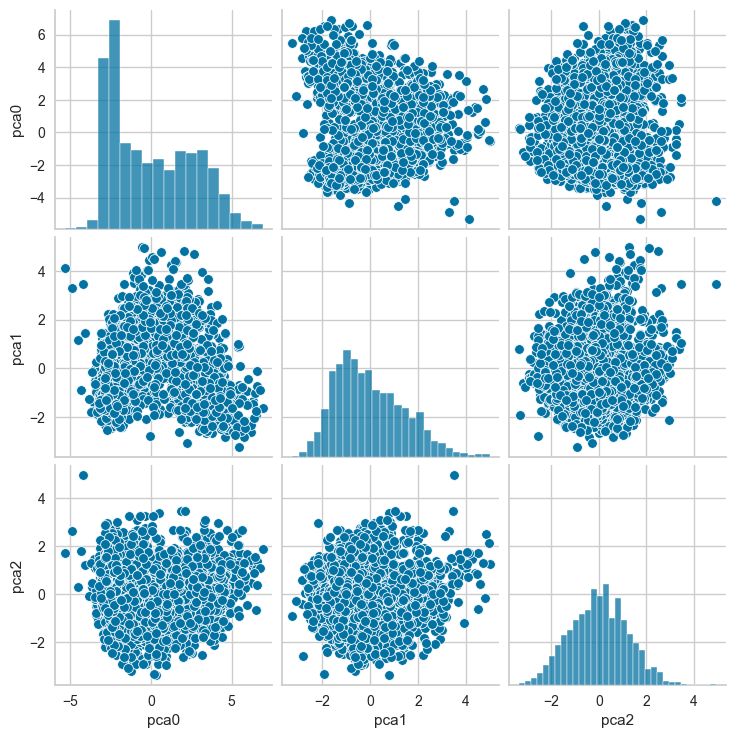

In [224]:
sns.pairplot(component_X)

<Axes: >

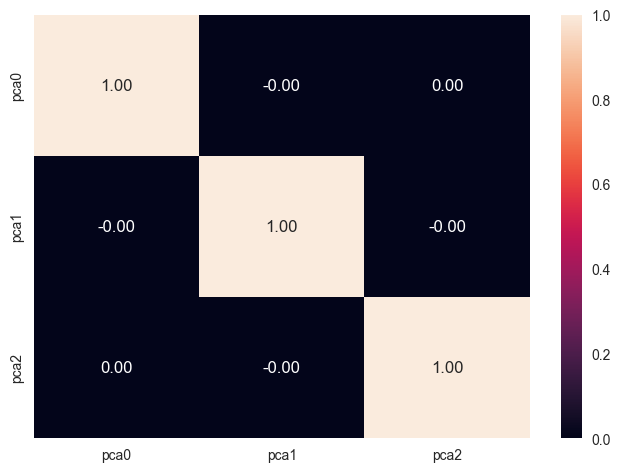

In [225]:
sns.heatmap(component_X.corr(), annot=True, fmt=".2f")

### **Finding optimal number of components

In [226]:
pca.explained_variance_

array([6.43180502, 2.04714831, 1.43399511])

In [227]:
pca.explained_variance_ratio_

array([0.35716096, 0.11367905, 0.07963038])

In [228]:
pca.explained_variance_ratio_.cumsum()


array([0.35716096, 0.47084001, 0.55047039])

Text(0, 0.5, 'Variance Ratio')

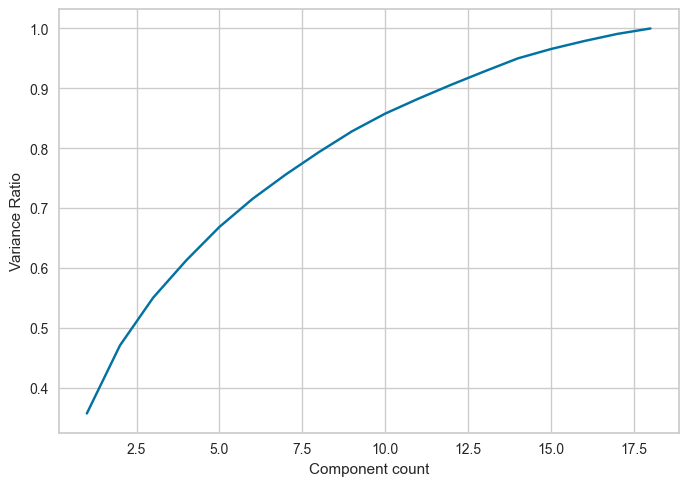

In [231]:
x = range(1, len(pca.explained_variance_ratio_) + 1)
pca = PCA()
pca.fit(scaled_X)

plt.plot(x, pca.explained_variance_ratio_.cumsum())

# plt.plot rearranges PCA's n_components hyper_parameter to n_components=x
# for each x value and calculates how much information the components carry
# on them in total for all values x will take up to 1, 2, 3 .......len(pca.explained_variance_ratio_)
# Returns cumulative totals with representation.
plt.xlabel("Component count")
plt.ylabel("Variance Ratio")

In [230]:
scaled_X.shape[1]

18

In [232]:
pca = PCA(n_components=scaled_X.shape[1]).fit(scaled_X)

In [233]:
my_dict = {"explained_variance": pca.explained_variance_,
           "explained_variance_ratio": pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio": pca.explained_variance_ratio_.cumsum()}

In [234]:
df_ev = pd.DataFrame(my_dict, index=range(1,(scaled_X.shape[1]+1)))
df_ev

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,6.43,0.36,0.36
2,2.05,0.11,0.47
3,1.43,0.08,0.55
4,1.12,0.06,0.61
5,1.01,0.06,0.67
6,0.84,0.05,0.72
7,0.73,0.04,0.76
8,0.67,0.04,0.79
9,0.63,0.03,0.83
10,0.53,0.03,0.86


In [235]:
df_ev.explained_variance.sum()

18.00814111261871

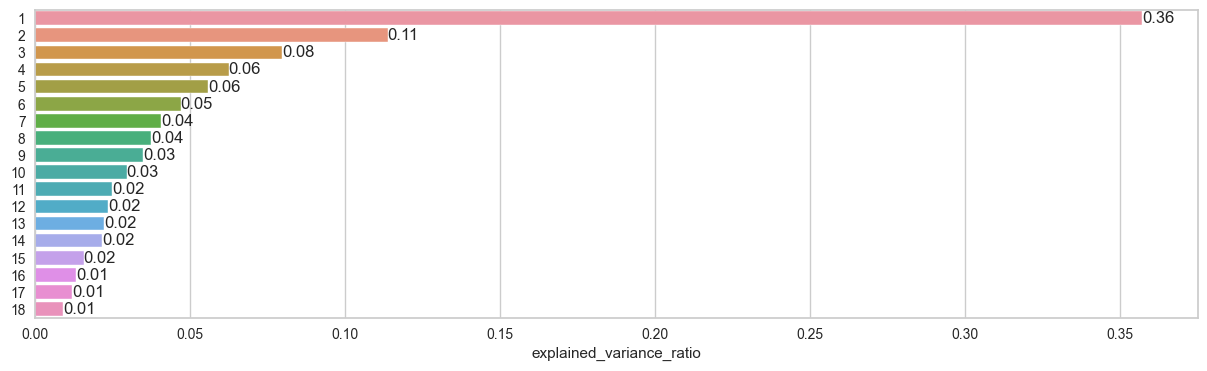

In [236]:
plt.figure(figsize=(15, 4))

ax = sns.barplot(y=df_ev.index,
                 x=df_ev.explained_variance_ratio,
                orient='horizontal')
ax.bar_label(ax.containers[0], fmt="%.2f");

#### Built K-Means with PCA algorithm

In [237]:
pca = PCA(n_components=11)

In [241]:
principal_components = pca.fit_transform(scaled_X)
principal_components

array([[ 3.73305341,  0.58808825,  1.96693439, ..., -0.28734671,
         1.29975525,  1.40252472],
       [-2.36868419, -0.25192029, -1.97165723, ..., -0.09991993,
        -0.03540116, -0.12461907],
       [ 1.83448674, -0.26136183, -0.24528124, ..., -0.60326733,
         1.16328927, -0.74846011],
       ...,
       [ 1.44196099, -0.97490043, -0.01558274, ..., -0.35767302,
         0.03453473, -1.29703052],
       [ 1.95690778,  0.59706753, -1.83274656, ...,  0.22055768,
         0.34702267, -0.19167706],
       [-1.83961964,  1.37757643, -0.23757949, ..., -0.07010103,
        -0.23007348, -0.55029071]])

In [242]:
# column_names = [f'pca{i}' for i in range(principal_components.shape[1])]
# component_X = pd.DataFrame(data=principal_components,columns=column_names)    #columns=["pca1", "pca2","pca3"])
# component_X.head(1)

In [243]:
component_X = pd.DataFrame(data=principal_components)
component_X.head(1)

,0,1,2,3,4,5,6,7,8,9,10
0,3.73,0.59,1.97,-1.25,0.27,-1.19,0.99,1.36,-0.29,1.30,1.40


In [301]:
component_X.shape

(2212, 13)

In [303]:
component_X.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'predicted_clusters', 'aglo_labels'], dtype='object')

In [ ]:
#####

In [244]:
rx.columns


Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Customer_Since_Days', 'Age', 'AcceptedCmps'],
      dtype='object')

In [245]:
 rx['Customer_Since_Days'].describe()

count     2212
mean    538.71
std     202.49
min        185
25%        365
50%        541
75%        714
max        884
Name: Customer_Since_Days, dtype: float64

In [246]:
 rx['Age'].max()

75

In [247]:
#####

# 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.

The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of purchases and Income
- **Spender Customers** --  Income is less but purcheses high, so can also be treated as potential target customer.

In [248]:
X=component_X

## K-means Clsutering

### Create a new dataset with numeric features

In [170]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [182]:
hopkins(X, 1)

0.8496877713111025

In [183]:
from sklearn.cluster import KMeans

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k,
                   random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

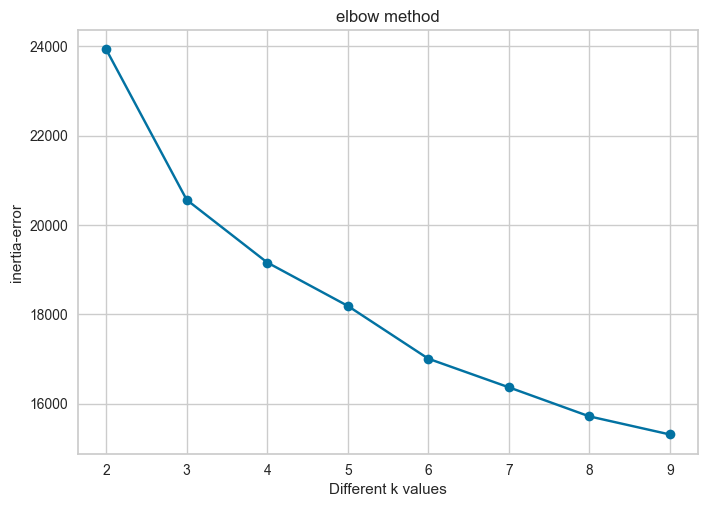

In [184]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

#### Determine optimal number of clusters

### inertia

In [1]:
def elbow_vis(X, k_range=range(2, 11), inertia=True):
    """
    This is a function that visualizes the elbow method for determining the optimal number of clusters in a dataset.

    Args:
        X (pd.Dataframe): Input data
        k_range (range, optional): generator for k values. Defaults to range(2, 11).
        inertia (bool, optional): to select either inertia or distorion. Defaults to True.
    Returns:
        None.
    """
    if inertia:
        inertias = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
            inertias.append(kmeanModel.inertia_)
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertias, "bo--")
        plt.xlabel("k")
        plt.ylabel("Inertia")
        plt.title("The Elbow Method showing the optimal k")
        plt.show()
    else:
        distortion = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42)
            kmeanModel.fit(X)
            distances = kmeanModel.transform(
                X
            )  # distances from each observation to each cluster centroid
            labels = kmeanModel.labels_
            result = []
            for i in range(k):
                cluster_distances = distances[
                    labels == i, i
                ]  # distances from observations in each cluster to their own centroid
                result.append(
                    np.mean(cluster_distances**2)
                )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
            distortion.append(
                sum(result)
            )  # sum the means of all clusters and add it to the distortion list

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, distortion, "r*--", markersize=14.0)
        plt.xlabel("Different k values")
        plt.ylabel("Distortion")
        plt.title("elbow method")

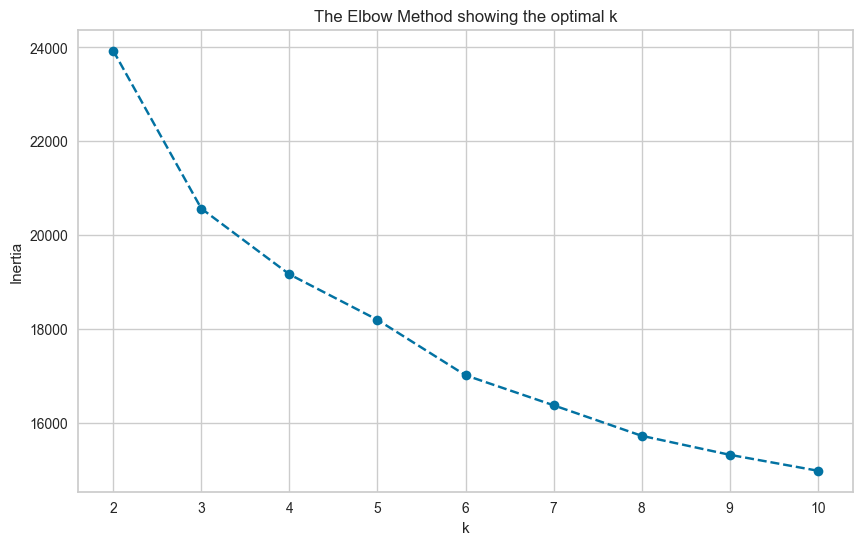

In [185]:
elbow_vis(X, k_range=range(2, 11), inertia=True)

### distortion

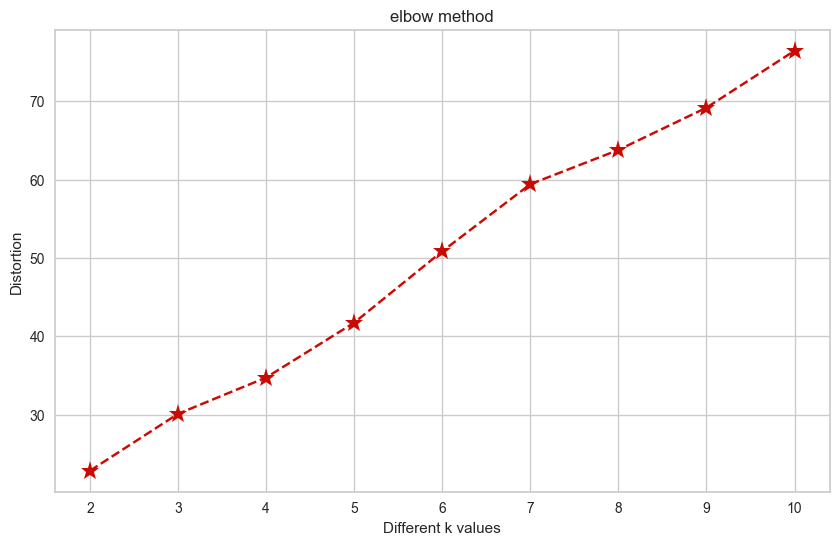

In [186]:
elbow_vis(X, k_range=range(2, 11), inertia=False)

### silhoutte score

In [187]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(component_X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3058091473455544
For n_clusters=3, the silhouette score is 0.23871012799994773
For n_clusters=4, the silhouette score is 0.16708436686145658
For n_clusters=5, the silhouette score is 0.16040061644916515
For n_clusters=6, the silhouette score is 0.1631458412528797
For n_clusters=7, the silhouette score is 0.15420215552517222
For n_clusters=8, the silhouette score is 0.14662219329898699
For n_clusters=9, the silhouette score is 0.14023038660322626
For n_clusters=10, the silhouette score is 0.13443987959701256


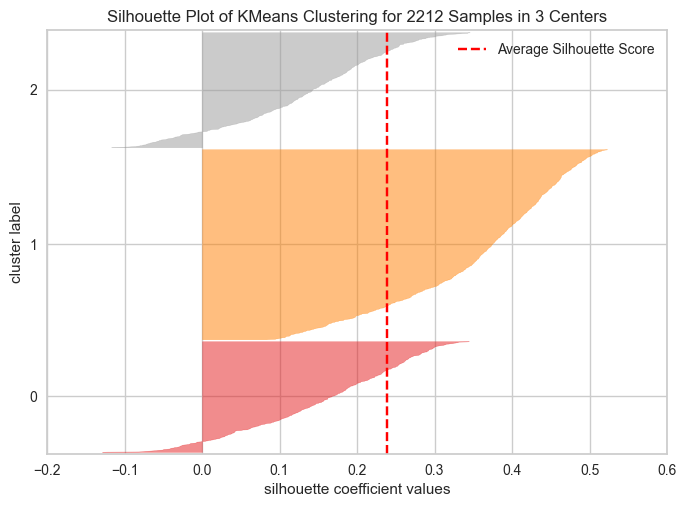

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2212 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [188]:
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)  # Fit the data to the visualizer
visualizer.poof()

In [189]:
## Let's do same thing above for all classes:
for i in range(3):
    label = (model3.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.15464352719472182
mean silhouette score for label 1    : 0.3521678337620801
mean silhouette score for label 2    : 0.13218968249138918
mean silhouette score for all labels : 0.23871012799994773


#### Apply K Means

In [251]:
model = KMeans(n_clusters = 3, random_state=42)
model.fit_predict(X)

array([0, 1, 0, ..., 0, 2, 1])

In [252]:
model.labels_

array([0, 1, 0, ..., 0, 2, 1])

In [253]:
X["predicted_clusters"] = model.labels_
X["predicted_clusters"].value_counts()

1    1011
2     612
0     589
Name: predicted_clusters, dtype: int64

#### Visualizing and Labeling All the Clusters

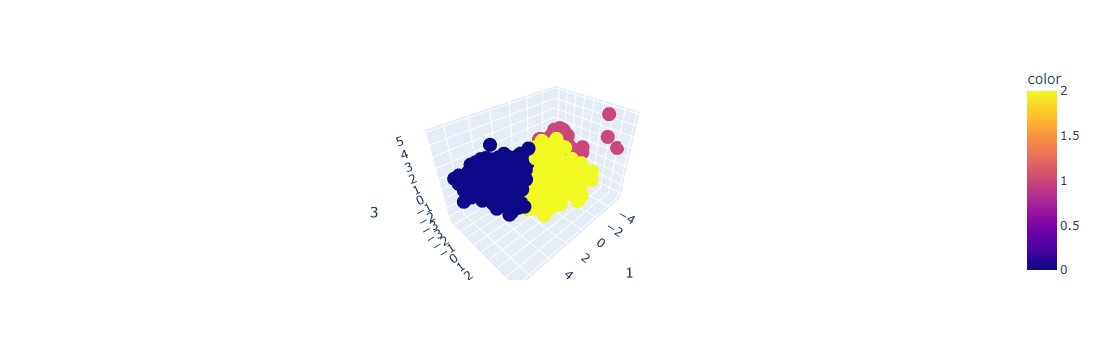

In [255]:
fig = px.scatter_3d(X, x=0, y=1, z=2, color=model.labels_)      # x='pca0', y='pca1', z='pca2'

# Customize the plot
fig.update_layout(scene=dict(xaxis_title="1", yaxis_title="2", zaxis_title="3"))
fig.show()

### Clustering based on selected features

#### Select features from existing data

In [261]:
clus_pred = X.groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2
0,3.38,-2.28,0.51
1,-0.81,-0.51,1.62
2,0.15,0.06,-0.24
3,-0.03,0.00,0.03
4,0.02,0.04,-0.09
5,-0.01,-0.05,0.09
6,0.15,0.03,-0.19
7,0.13,0.10,-0.28
8,-0.05,-0.02,0.08
9,0.04,-0.04,0.03


In [263]:
clus_pred_scaled = MinMaxScaler().set_output(transform="pandas").fit_transform(clus_pred.T).T     #I used pca data , therefore I don't need to scale

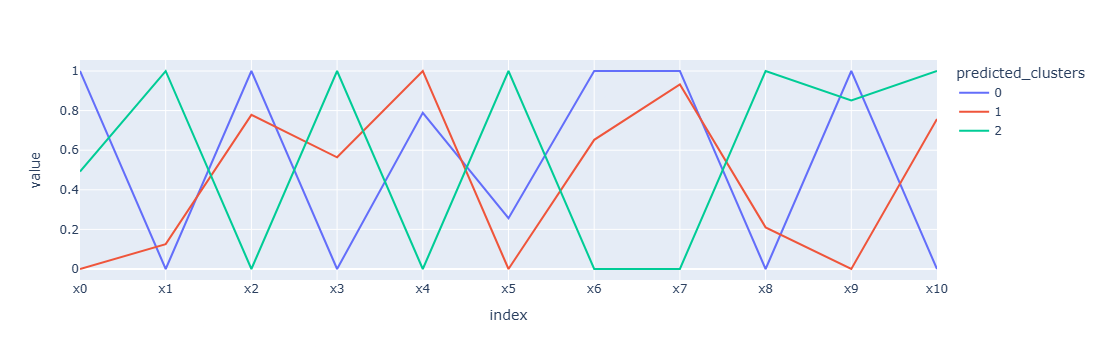

In [264]:
fig = px.line(data_frame=clus_pred_scaled)
fig.show(renderer="vscode")

In [265]:
X.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'predicted_clusters'], dtype='object')

In [269]:
selected_features = [0,3,4,6]
#     "income",
#     "mntwines",
#     "mntmeatproducts",
#     "numcatalogpurchases",
#     "mntgoldprods",
#     "age",
# ]
# Create a new DataFrame with the selected features
df_selected = X[selected_features]
df_selected.head(15)

,0,3,4,6
0,3.73,-1.25,0.27,0.99
1,-2.37,-0.29,-0.30,0.50
2,1.83,-0.44,-1.06,-0.71
3,-2.62,0.21,-0.84,-0.28
4,-0.37,-0.56,1.35,0.12
5,0.86,0.06,-1.25,-0.09
6,0.79,-0.92,-0.72,0.24
7,-2.33,0.34,-0.60,-0.26
8,-2.92,0.43,-0.96,0.07
9,-4.54,1.34,0.77,-0.90


#### Determine optimal number of clusters for selected features

In [ ]:
#df_selected = scaler1.fit_transform(df_selected)  # I don'need it, I use pca data, pca data is scaled

In [271]:
result = []
for _ in range(10):
    result.append(hopkins(df_selected, 0.05))

np.mean(result)

0.891292396005696

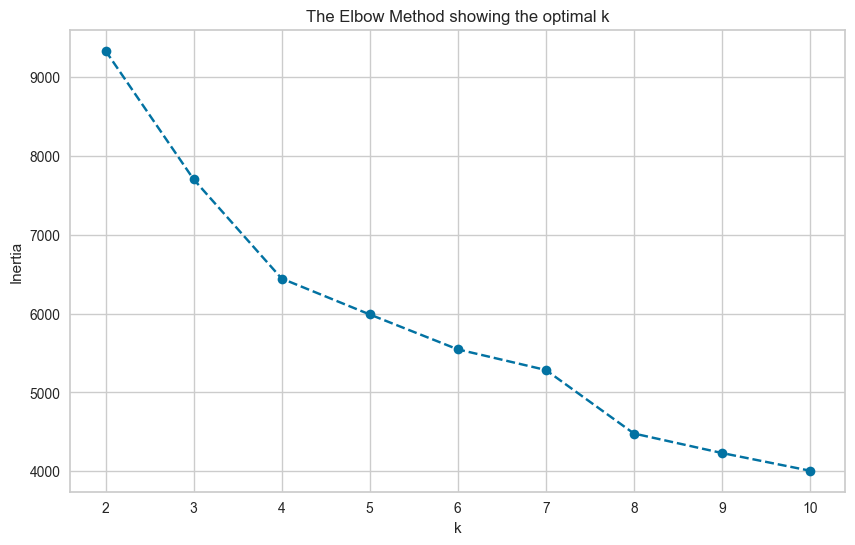

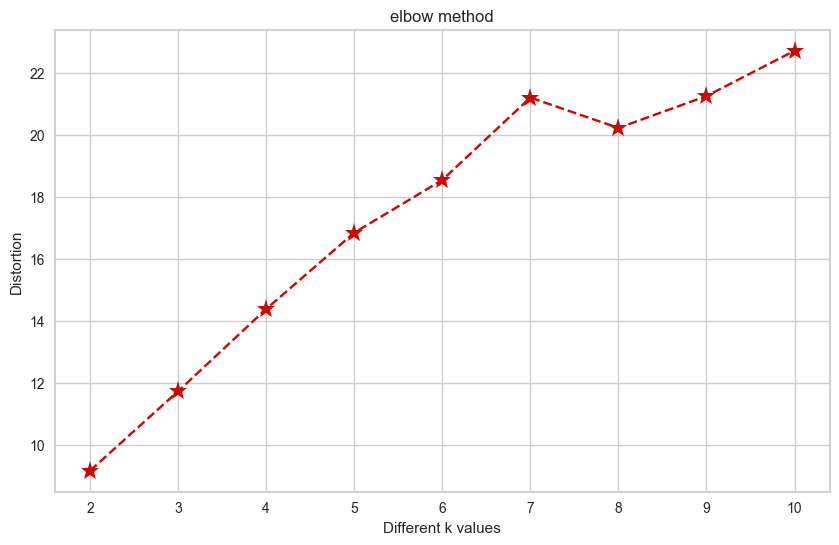

In [272]:
elbow_vis(df_selected)
elbow_vis(df_selected, inertia=False)

In [273]:
range_n_clusters = range(2, 9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_selected)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_selected, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4805619844833729
For n_clusters=3, the silhouette score is 0.33926280760053584
For n_clusters=4, the silhouette score is 0.3357205948693951
For n_clusters=5, the silhouette score is 0.2933400798335586
For n_clusters=6, the silhouette score is 0.2689623753843811
For n_clusters=7, the silhouette score is 0.27986816868578346
For n_clusters=8, the silhouette score is 0.2588195488999355


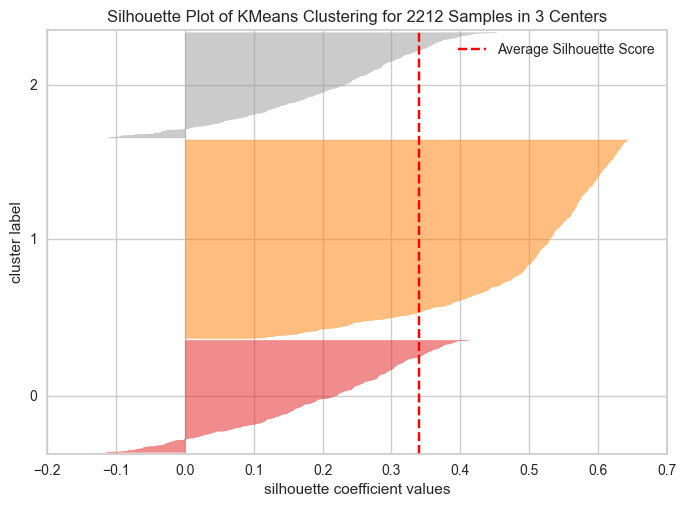

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2212 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [274]:
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_selected)  # Fit the data to the visualizer
visualizer.poof()

In [275]:
for i in range(model3.n_clusters):
    label = model3.labels_ == i
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.2093262022867681
mean silhouette score for label 1    : 0.4953761407706155
mean silhouette score for label 2    : 0.20642307017383432
mean silhouette score for all labels : 0.33926280760053584


#### Building the model based on the optimal number of clusters with selected features

In [277]:
final_model = KMeans(n_clusters=3, random_state=42)
final_model.fit_predict(df_selected)

array([0, 1, 2, ..., 2, 2, 1])

#### We have made our inferences on the Kmeans algorithm so far, and we will take and compare the results with another clustering algorithm, Hierarchical Clustering:


### The point we need to pay attention to is the number of clusters in kmeans so that we can find the differences.

## Hierarchical Clustering

### Determine optimal number of clusters using Dendogram

In [285]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram


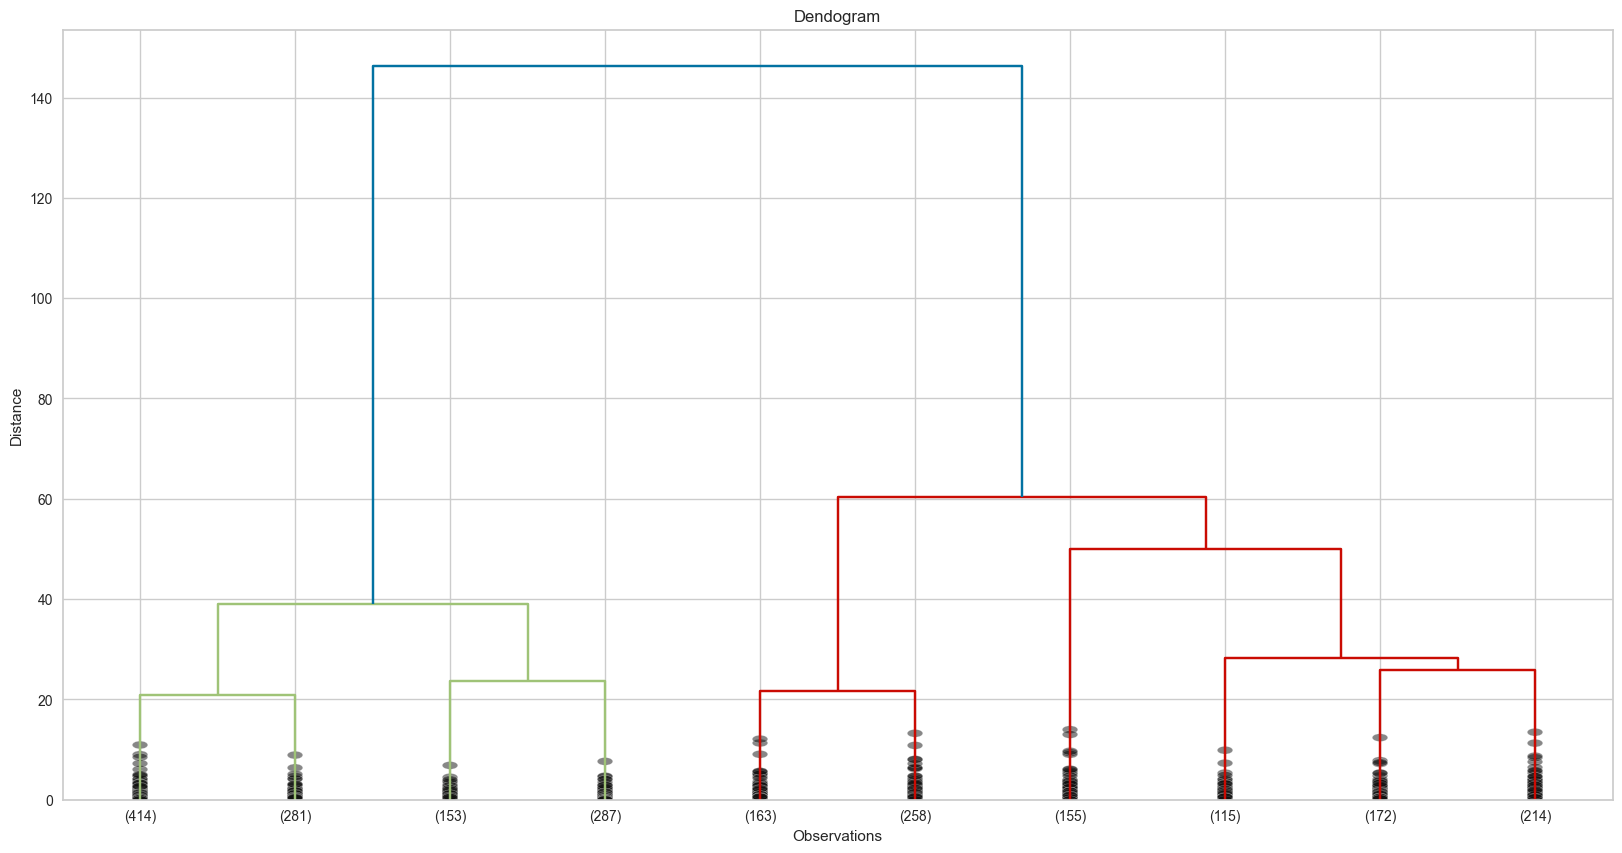

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

In [287]:
@interact(method=["ward", "complete", "average", "single"])
def dendogramer(method):
    link = linkage(y=df_selected, method=method)
    plt.figure(figsize=(20, 10))
    plt.title("Dendogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(
        link, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10
    )

### silhouette_score

In [288]:
ange_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(df_selected)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_selected, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4463683234522949
For n_clusters=3, the silhouette score is 0.31126328466375797
For n_clusters=4, the silhouette score is 0.3291600439123044
For n_clusters=5, the silhouette score is 0.24576770000611203
For n_clusters=6, the silhouette score is 0.22667164333257708
For n_clusters=7, the silhouette score is 0.22722897559427352
For n_clusters=8, the silhouette score is 0.1982720657692229


### Clustering based on selected features

In [289]:
df_selected.shape

(2212, 4)

In [290]:
df_selected.head()

,0,3,4,6
0,3.73,-1.25,0.27,0.99
1,-2.37,-0.29,-0.30,0.50
2,1.83,-0.44,-1.06,-0.71
3,-2.62,0.21,-0.84,-0.28
4,-0.37,-0.56,1.35,0.12


In [291]:
Agg1 = AgglomerativeClustering(
    n_clusters=3,
    metric="euclidean",  # If linkage = "ward" then metric='euclidean' is required.
    linkage="ward",
)  # originating from the formulation of variance...
y_agg = Agg1.fit_predict(df_selected)

In [293]:
X["aglo_labels"] = y_agg

In [306]:
X.iloc[:, -2:].head()

,predicted_clusters,aglo_labels
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1


In [298]:
pd.crosstab(X["predicted_clusters"], X["aglo_labels"])

aglo_labels,0,1,2
predicted_clusters,,,
0,542,0,47
1,0,990,21
2,114,145,353


In [316]:
r2.shape

(2236, 29)

In [341]:
r2.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,max_date,Customer_Since_Days,Age,AcceptedCmps
0,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,2012-11-01,848,58,0
1,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,2014-04-15,298,61,0
2,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,2013-09-16,497,50,0
3,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,2014-03-08,324,31,0
4,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,2014-04-23,346,34,0


In [327]:
final_df=r2[~r2.Income.isna()].copy()

In [328]:
final_df.shape

(2212, 29)

In [329]:
final_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2229, 2230, 2231, 2232, 2234, 2235, 2236, 2237, 2238, 2239],
           dtype='int64', length=2212)

In [330]:
final_df = final_df.reset_index(drop=True)

In [331]:
final_df.index

RangeIndex(start=0, stop=2212, step=1)

In [332]:
final_df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'max_date', 'Customer_Since_Days', 'Age',
       'AcceptedCmps'],
      dtype='object')

In [333]:
X.shape

(2212, 13)

In [334]:
X.index

RangeIndex(start=0, stop=2212, step=1)

In [335]:
final_df=pd.concat([final_df,X.iloc[:, -2:]],axis=1)

In [336]:
final_df.shape

(2212, 31)

In [337]:
final_df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'max_date', 'Customer_Since_Days', 'Age',
       'AcceptedCmps', 'predicted_clusters', 'aglo_labels'],
      dtype='object')

In [338]:
def income_binner(x):
    if x < 35533:
        return 0
    elif x < 68277:
        return 1
    else:
        return 2

final_df["income_class"] = final_df["Income"].apply(income_binner)

In [342]:
final_df["income_class"].value_counts()

1    1093
0     560
2     559
Name: income_class, dtype: int64

In [351]:
final_df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2212,2212,2212,2212,2212,2212
mean,305.29,26.33,167.03,37.65,27.05,43.93
std,337.32,39.74,224.25,54.77,41.09,51.71
min,0,0,0,0,0,0
25%,24,2,16,3,1,9
50%,175.50,8,68,12,8,24.50
75%,505,33,232.25,50,33,56
max,1493,199,1725,259,262,321


In [353]:
final_df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum().sort_values()

MntFruits            58241
MntSweetProducts     59827
MntFishProducts      83279
MntGoldProds         97164
MntMeatProducts     369470
MntWines            675296
dtype: int64

In [ ]:
# ax = (
#     final_df[["education"]]
#     .join(final_df.iloc[:, 8:11])
#     .groupby(['aglo_labels',"education"])
#     .median()
#     .plot(kind="bar", figsize=(20, 6), fontsize=20)
# )
# for p in ax.containers:
#     ax.bar_label(p, fmt="%.f", size=14)

In [360]:
final_df[
        ['aglo_labels',
         'MntMeatProducts',"MntFishProducts",'MntWines', 'MntGoldProds',
            "income_class",
        ]
     ].groupby(['aglo_labels',"income_class", ]).sum()

MntMeatProducts  MntFishProducts  MntWines  \
aglo_labels income_class                                               
0           0                        2090              317       329   
            1                       48793            14546     92665   
            2                      229714            46779    319466   
1           0                        9664             3871     11149   
            1                       22565             4762     63196   
            2                         116               20       311   
2           0                         971              647       806   
            1                       41698             9717    151007   
            2                       13859             2620     36367   

                          MntGoldProds  
aglo_labels income_class                
0           0                      250  
            1                    14767  
            2                    37076  
1           0                     7758  
            1                    12725  
            2                       22  
2           0                     1416  
            1                    20017  
            2                     3133

In [365]:
final_df[
        ['aglo_labels',
         'MntMeatProducts',"MntFishProducts",'MntWines', 'MntGoldProds'
           
        ]
     ].groupby(['aglo_labels' ]).sum()

,MntMeatProducts,MntFishProducts,MntWines,MntGoldProds
aglo_labels,,,,
0,280597,61642,412460,52093
1,32345,8653,74656,20505
2,56528,12984,188180,24566


In [367]:
final_df[
        ['aglo_labels',
         'MntMeatProducts',"MntFishProducts",'MntWines', 'MntGoldProds'
           
        ]
     ].groupby(['aglo_labels' ]).median()

,MntMeatProducts,MntFishProducts,MntWines,MntGoldProds
aglo_labels,,,,
0,396,80,567.50,58.50
1,16,4,26,11
2,122,20,399,40


In [368]:
final_df[
        ['aglo_labels',
         'MntMeatProducts',"MntFishProducts",'MntWines', 'MntGoldProds'
           
        ]
     ].groupby(['aglo_labels' ]).mean()

,MntMeatProducts,MntFishProducts,MntWines,MntGoldProds
aglo_labels,,,,
0,427.74,93.97,628.75,79.41
1,28.50,7.62,65.78,18.07
2,134.27,30.84,446.98,58.35


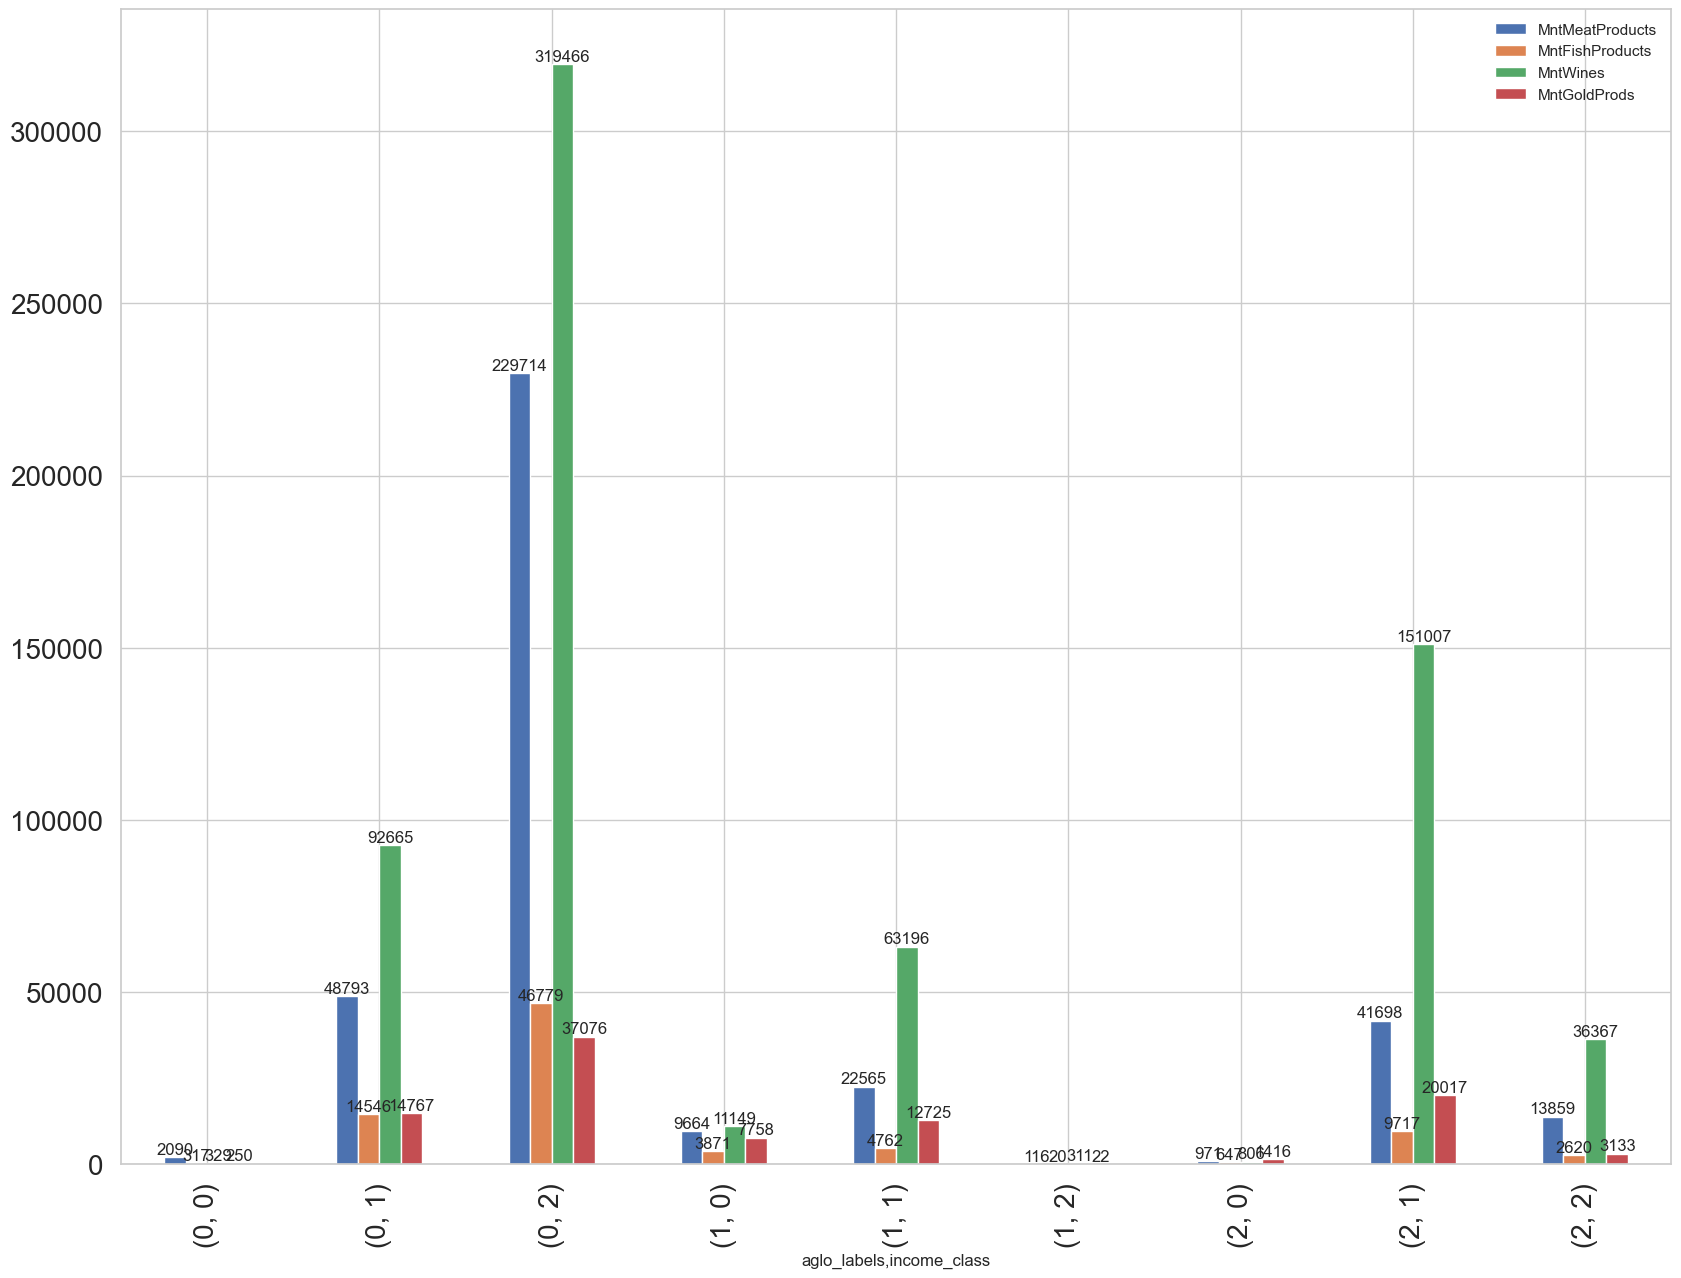

In [363]:
ax = (
    final_df[
        ['aglo_labels',
         'MntMeatProducts',"MntFishProducts",'MntWines', 'MntGoldProds',
            "income_class",
        ]
    ]
    .groupby(['aglo_labels',"income_class", ])
    .sum()
    .plot(kind="bar", figsize=(20, 15), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=12)

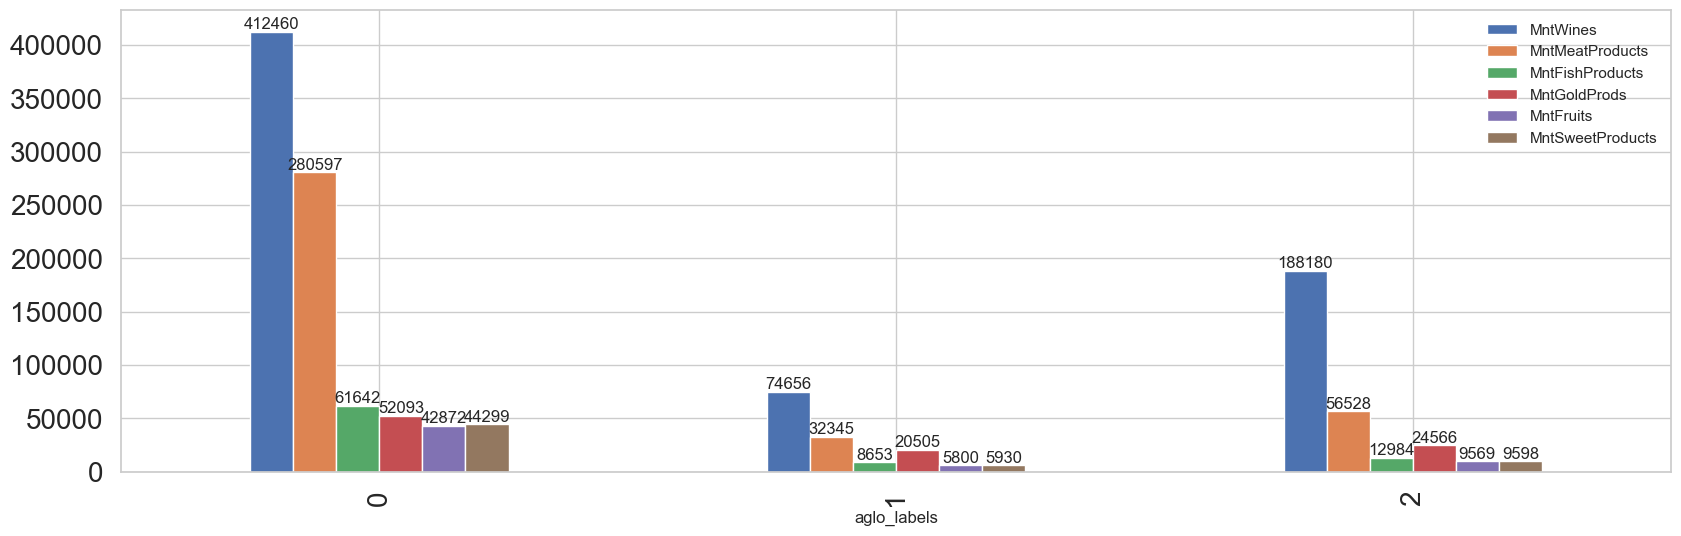

In [362]:
ax = (
    final_df[
        ['aglo_labels',
         'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds','MntFruits', 'MntSweetProducts'
           
        ]
    ]
    .groupby(['aglo_labels' ])
    .sum()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=12)

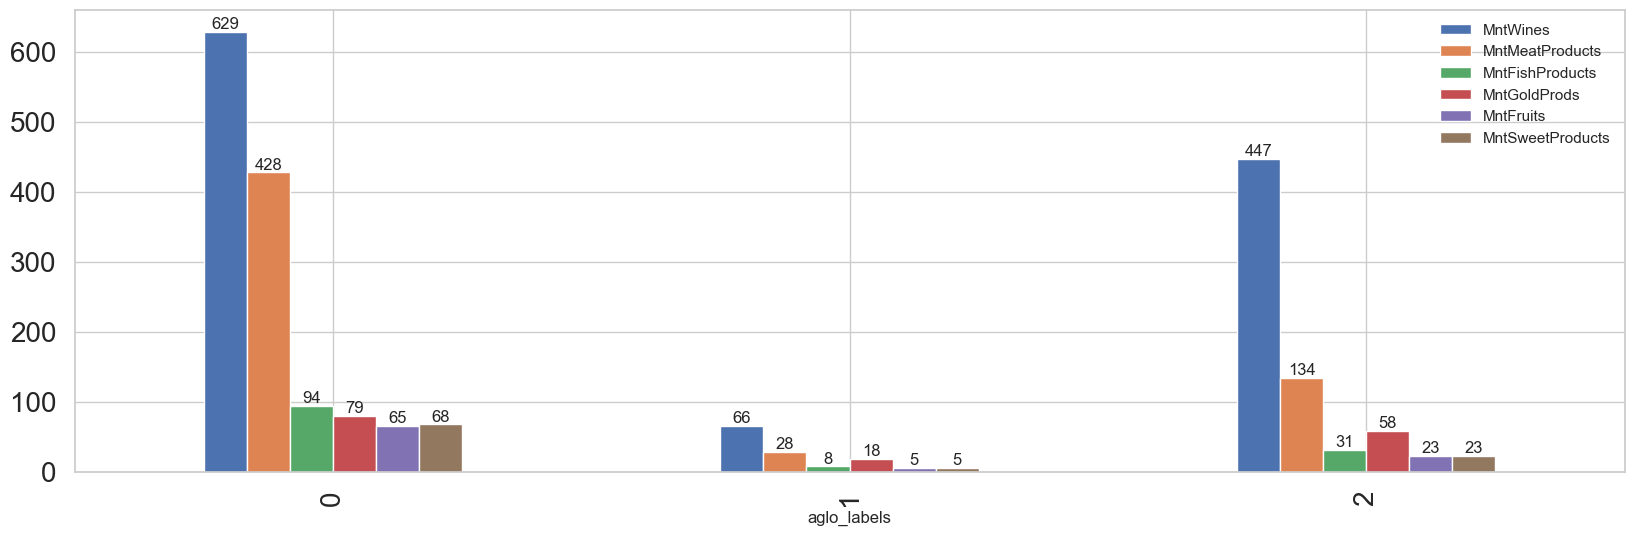

In [370]:
ax = (
    final_df[
        ['aglo_labels',
         'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds','MntFruits', 'MntSweetProducts'
           
        ]
    ]
    .groupby(['aglo_labels' ])
    .mean()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=12)

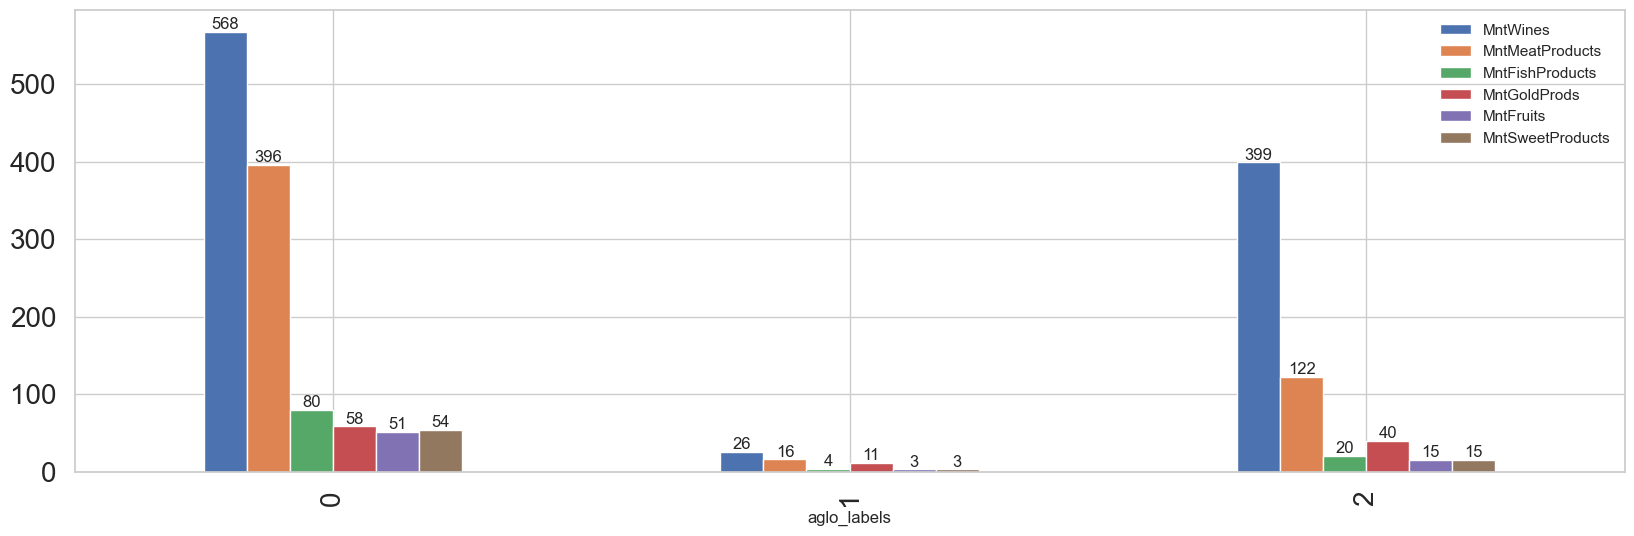

In [371]:
ax = (
    final_df[
        ['aglo_labels',
         'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds','MntFruits', 'MntSweetProducts'
           
        ]
    ]
    .groupby(['aglo_labels' ])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=12)

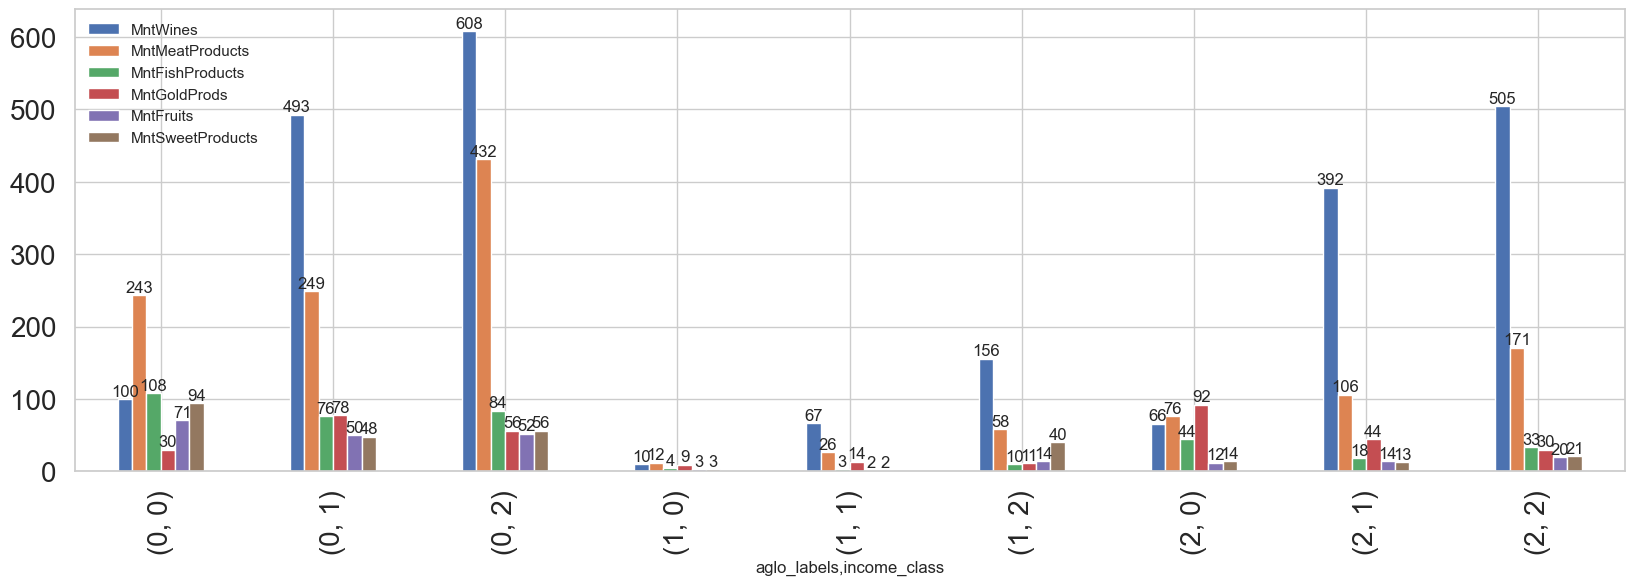

In [372]:
ax = (
    final_df[
        ['aglo_labels','income_class',
         'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds','MntFruits', 'MntSweetProducts'
           
        ]
    ]
    .groupby(['aglo_labels','income_class' ])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=12)

In [373]:
final_df["aglo_labels"].value_counts()

1    1135
0     656
2     421
Name: aglo_labels, dtype: int64

<Axes: >

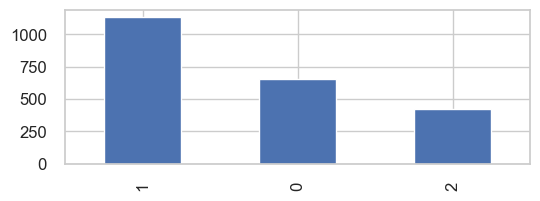

In [377]:
final_df["aglo_labels"].value_counts().plot(kind="bar", figsize=(6,2), fontsize=12)

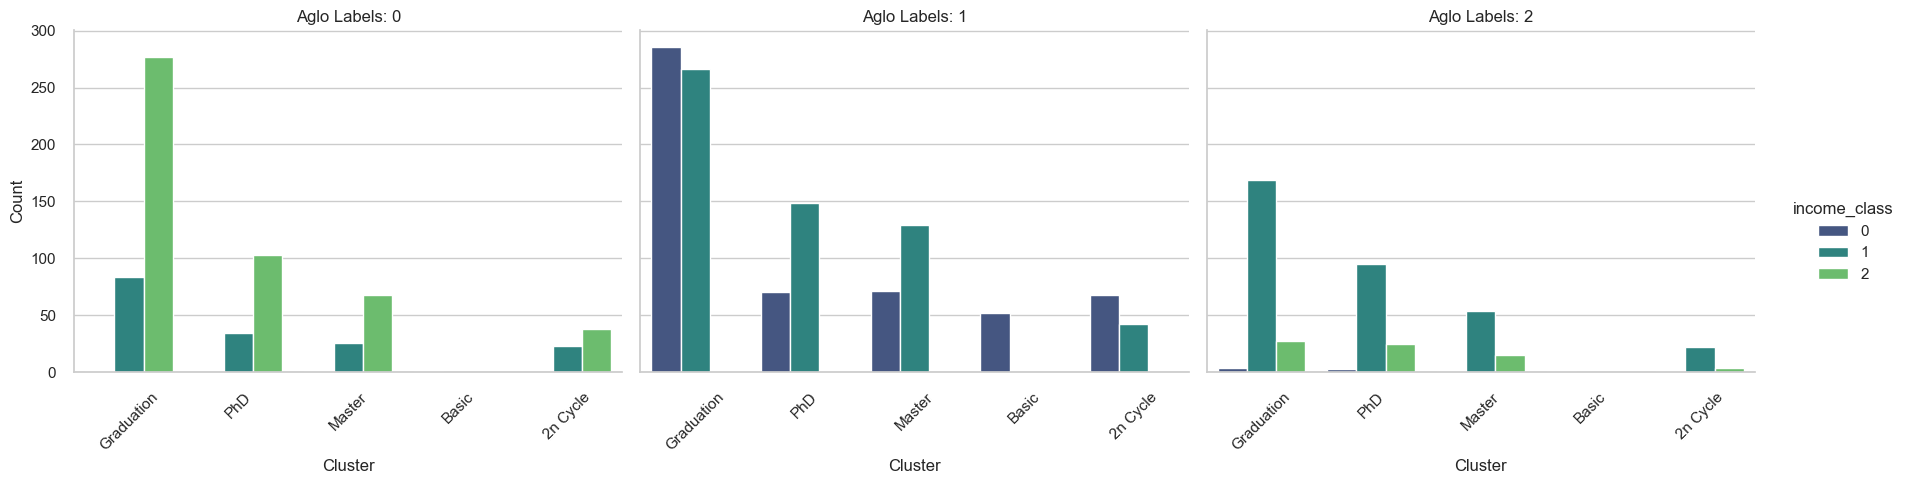

In [348]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Set a style (optional)
sns.set(style="whitegrid")

# Create the plot
g = sns.catplot(
    data=final_df,
    kind="count",
    x="Education",
    hue="income_class",
    col="aglo_labels",       # Separate plot per education level
    col_wrap=3,            # Wrap columns if there are many
    height=5,
    aspect=1.2,
    palette="viridis",
)

# Customize axes
g.set_titles("Aglo Labels: {col_name}")
g.set_axis_labels("Cluster", "Count")
g.set_xticklabels(rotation=45)
g.tight_layout()
plt.show()

## Conclusion

Labeling for Customer Segments:

Cluster 0: High-Activity Customers
Cluster 1: Low-Activity Customers
Cluster 2: Moderate-Activity Customers